In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [2]:
# Importar dataset
iris = datasets.load_iris()

In [3]:
#Tome un atributo
X = iris.data[:, :2]  #Longitud del tallo
y = iris.target       #Ancho del tallo

In [4]:
# Genere las maquinas de soporte vectorial
svc = svm.SVC(kernel='linear').fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3).fit(X, y)

In [5]:
#Definición de los parámetros para presentar resultados
h = .02  # Paso de la malla del grafico

In [6]:
# Crear malla
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [7]:
# Titulos para los graficos
titles = ['SVM con kernel lineal',
          'SVM con kernel RBF',
          'SVM con kernel polinomico de grado 3']

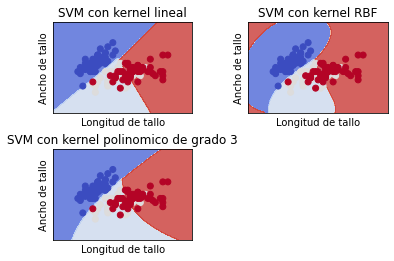

In [8]:
#Preparar graficos
for i, clf in enumerate((svc, rbf_svc, poly_svc)):
    # Trazo del limite del area de desicion de los datos
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    #Estimar el valor de salida con cada predictor
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Ponga el resultado en el area sombreada
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    #Imprima los puntos sobre el area sombreada
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Longitud de tallo')
    plt.ylabel('Ancho de tallo')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()
